In [11]:
import numpy as np
import pandas as pd
from GDA import Gaussian_Discriminant_Analysis
from neural_network import NeuralNetwork
from logistic_regression import LogisticRegressionNewtons
from logistic_regression import LogisticRegressionBGD

In [36]:
from sklearn.datasets import make_classification
data = data = make_classification(n_features = 2, n_redundant=0)
x = data[0]
y = data[1]
df = pd.DataFrame(x)
df['y'] = y

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

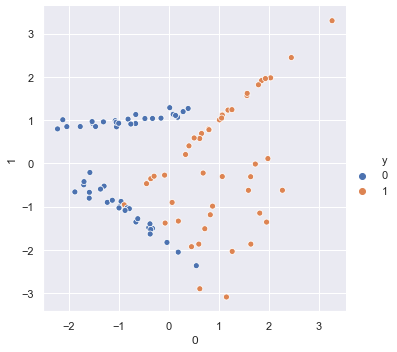

In [38]:
sns.relplot(data=df, x=0, y=1, hue='y')

In [39]:
gda = Gaussian_Discriminant_Analysis()
net = NeuralNetwork([2, 4, 1])
lrn = LogisticRegressionNewtons()
lrb = LogisticRegressionBGD(change=1e-7)
models = [gda, net, lrn, lrb]
names = ['Gaussian Discriminant Analysis', 'Neural Network',
         'Logsitic Regression Newtons', 'Logistic Regression Gradient Descent']
preds = list()
accs = list()

In [40]:
import time
times = list()
for model in models:
    t0 = time.time()
    model.fit(x, y)
    t1 = time.time()
    pred = model.predict(x)
    pred = [0 if x < 0.5 else 1 for x in pred]
    preds.append(pred)
    accs.append(1 - np.sum(abs(pred - y)) / 100)
    times.append(t1-t0)
    
print('Accuracies and Times:')
for i in range(len(times)):
    print(names[i] + ': ' + str(accs[i]) + '%, ' + str(times[i]) + ' seconds')

Accuracies and Times:
Gaussian Discriminant Analysis: 0.89%, 0.000537872314453125 seconds
Neural Network: 0.86%, 1.0905070304870605 seconds
Logsitic Regression Newtons: 0.89%, 0.18470025062561035 seconds
Logistic Regression Gradient Descent: 0.88%, 0.06602692604064941 seconds


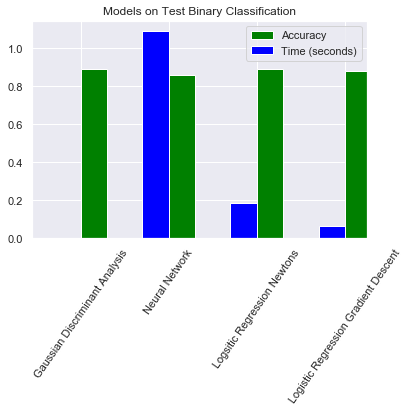

In [99]:
model_data = pd.DataFrame(zip(names, accs, times), columns=['Model', 'Accuracy', 'Time'])
sns.set()
fig, ax = plt.subplots()
model_data.Accuracy.plot(kind='bar',color='green',ax=ax, width=0.3, position=0)
model_data.Time.plot(kind='bar',color='blue',ax=ax, width=0.3, position=1)
plt.xticks(range(4), labels=names, rotation=55)
plt.legend(loc=1, labels=['Accuracy', 'Time (seconds)'])
plt.title('Models on Test Binary Classification')
plt.savefig('./test_graphs.png', bbox_inches='tight')

In [103]:
def plot_contour(x, y, model, corr=1,cmap='Paired'):
    cmap = plt.get_cmap(cmap)
    fig, ax = plt.subplots()
    ax.scatter(x[:, -2], x[:, -1], c=y, cmap=cmap)
    xmin, xmax = x[:,0].min() - 1, x[:,0].max() + 1
    ymin, ymax = x[:,1].min() - 1, x[:,1].max() + 1
    x_span = np.linspace(xmin, xmax, 1000)
    y_span = np.linspace(ymin, ymax, 1000)
    xs, ys = np.meshgrid(x_span, y_span)
    labels = model.predict(np.c_[xs.ravel(), ys.ravel()])

    z = np.array([0 if x < 0.5 else 1 for x in labels])
    z = z.reshape(xs.shape)
    ax.contourf(xs, ys, z, cmap=cmap, alpha=0.5)
    

In [97]:
model_data

,Model,Accuracy,Time
0,Gaussian Discriminant Analysis,0.89,0.000538
1,Neural Network,0.86,1.090507
2,Logsitic Regression Newtons,0.89,0.184700
3,Logistic Regression Gradient Descent,0.88,0.066027


# Decision Boundaries

## Gaussian Discriminant Analysis Boundary

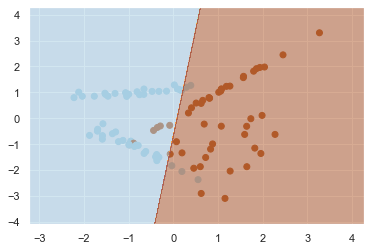

In [109]:
plot_contour(x, y, models[0])

## Logistic Regression Newtons Boundary

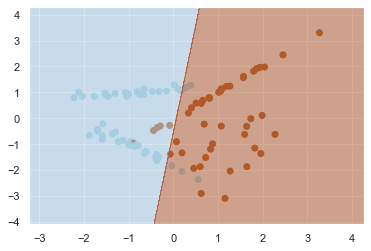

In [105]:
plot_contour(x, y, models[2])

## Logistic Regression Gradient Descent Boundary

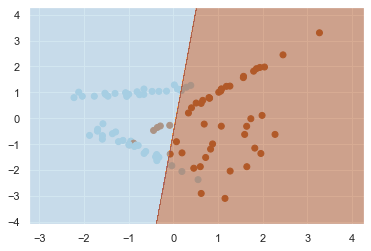

In [106]:
plot_contour(x, y, models[3])
plt.savefig('./linear_boundary.png')

## Neural Network Boundary

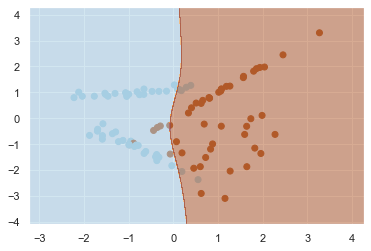

In [111]:
plot_contour(x, y, models[1])
plt.savefig('./curved_boundary.png')